## Exploratory Data Analysis 

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Upload the AB_NYC_2019 to import the data as below

In [ ]:
#reading the CSV file
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
#creating copy of dataframe
df1 = df.copy()

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

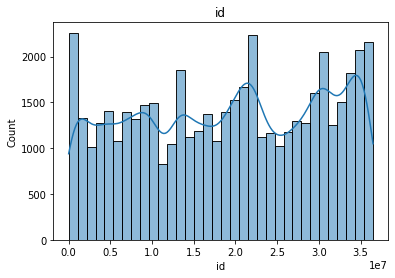

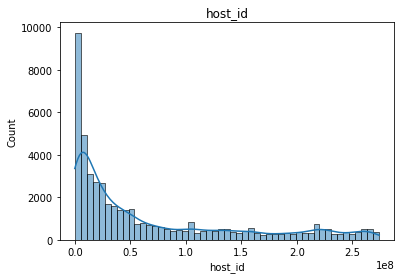

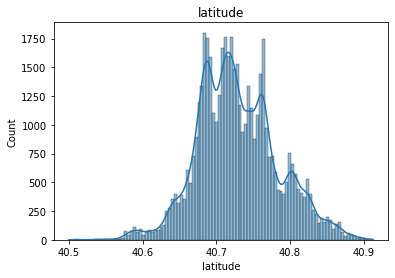

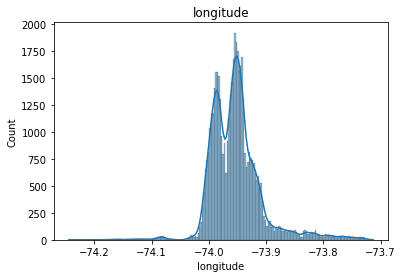

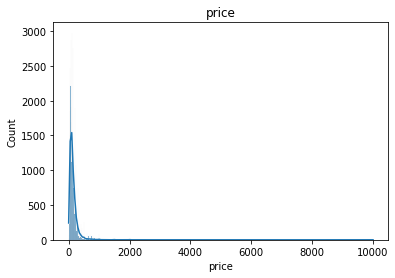

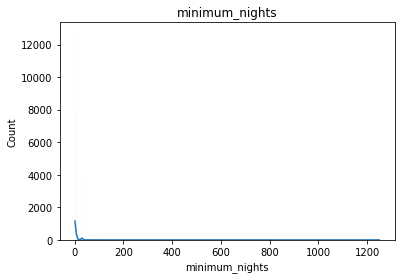

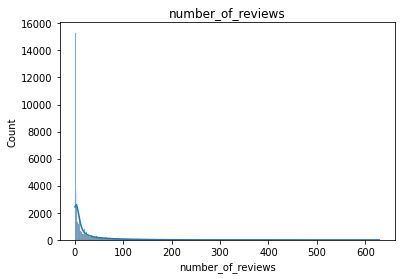

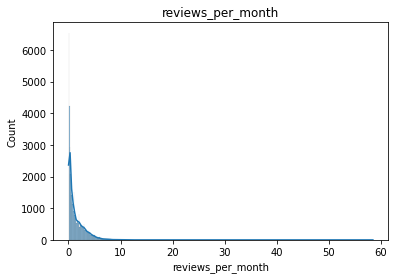

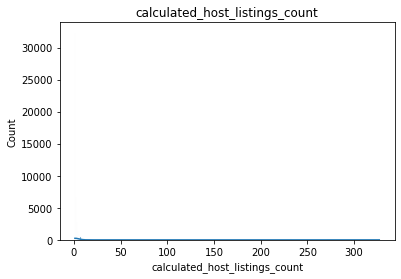

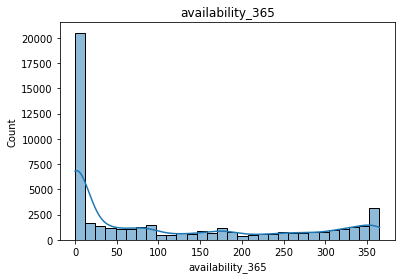

In [ ]:
#histogram of all numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data=df[col], kde=True)
    plt.title(col)

# show the plots
plt.show()

#might be interesting to look into minimum_nights, number_of_reviews, reviews_per_month columns

1
1250


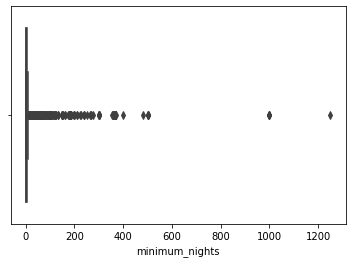

In [ ]:
#boxplot of minimum nights - appears to be outliers since it ranges from 1-1250
sns.boxplot(x=df["minimum_nights"])
print(df['minimum_nights'].min())
print(df['minimum_nights'].max())

In [ ]:
#calculated_host_listings_count
print(df['calculated_host_listings_count'].min())
print(df['calculated_host_listings_count'].max())

#can make a new feature out of this? - new hosts vs experienced hosts?

1
327


<AxesSubplot:>

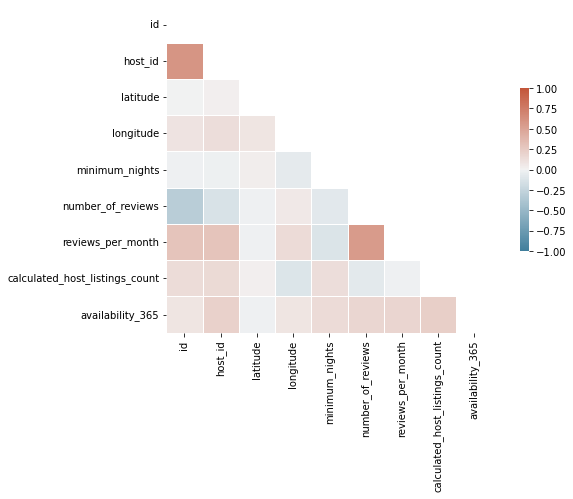

In [ ]:
#Compute the correlation matrix of features
corr = df.loc[:, df.columns!='price'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

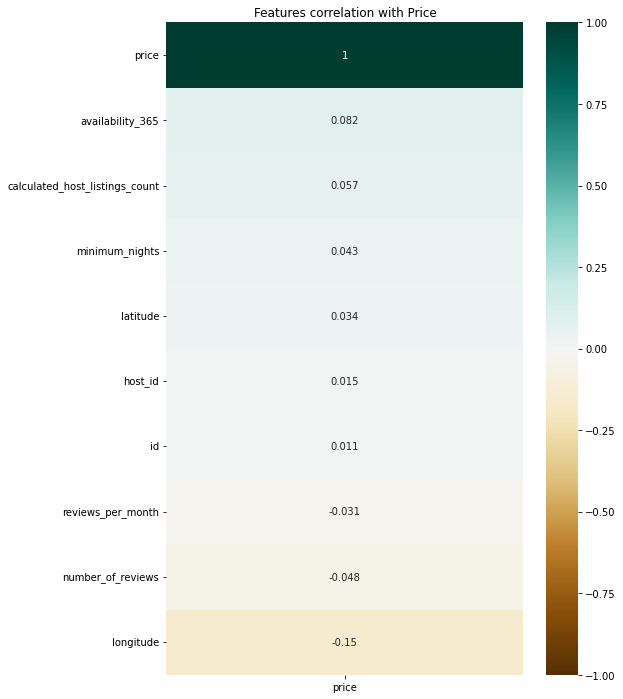

In [ ]:
#Correlation of numerical features with label (price)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlation with Price');

In [ ]:
#listing categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


Listings per neighbourhood:
 Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

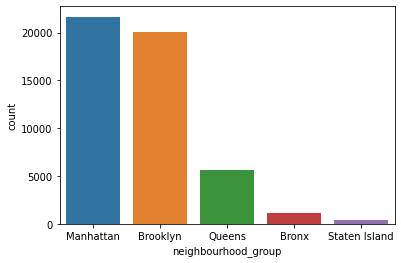

In [ ]:
#neighbourhood group
print("Listings per neighbourhood:\n", df.neighbourhood_group.value_counts())
sns.countplot(data=df, x=df['neighbourhood_group'], order=df["neighbourhood_group"].value_counts(ascending=False).index)

Room types of listings:
 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


<AxesSubplot:xlabel='room_type', ylabel='count'>

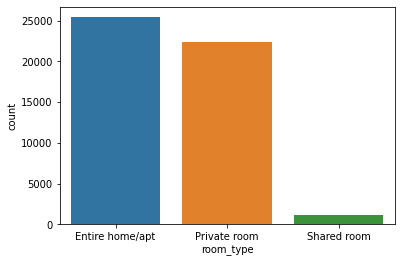

In [ ]:
#room types
print("Room types of listings:\n", df.room_type.value_counts())
sns.countplot(data=df, x=df['room_type'], order=df["room_type"].value_counts(ascending=False).index)

In [ ]:
#average price per room type
grouped = df.groupby("room_type")["price"].mean()
print(grouped)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64
